In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import os

In [2]:
# series:       1 dimensional labelled / indexed array
# dataframes:   A dataframe is similar to Excel workbook
#              – you have column names referring to columns and you have rows,
#                which can be accessed with use of row numbers

data_file = os.path.join("train_loan_pred.csv")

train_data = pd.read_csv(data_file)
# to get general idea of data-fileds, first 10 examples are displayed
train_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
# to get additional information about the dataset eg , missing values, percentages, means
#	         ApplicantIncome	  CoapplicantIncome	  LoanAmount	Loan_Amount_Term	Credit_History
# ========================================================================================

train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
# to get statistics of non numerical fileds

train_data['Education'].value_counts()


Graduate        480
Not Graduate    134
Name: Education, dtype: int64

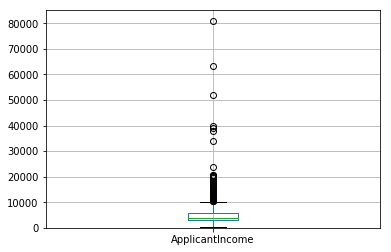

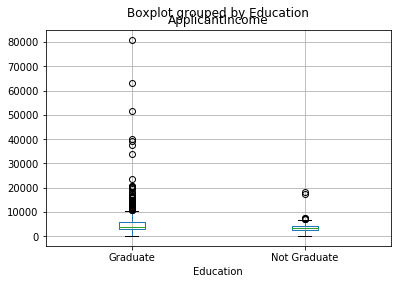

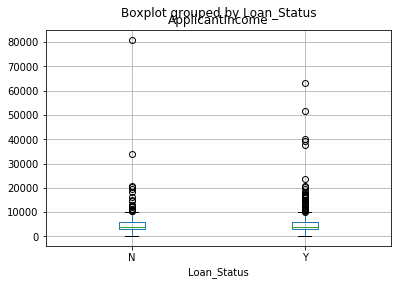

In [5]:
# to actualy analyse the data after this point various graphs, plots can be used
# eg :  histogram for genral idea
#       box plot / group box plot for distribution-outlier clarity
train_data['ApplicantIncome'].hist(bins=100)
train_data.boxplot(column='ApplicantIncome')
train_data.boxplot(column='ApplicantIncome', by = 'Education')
train_data.boxplot(column='ApplicantIncome', by = 'Loan_Status')


Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


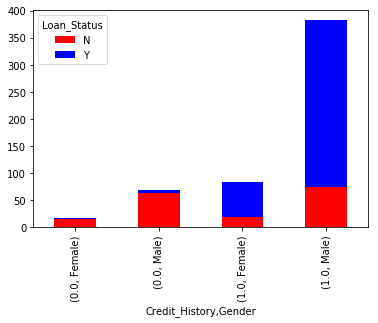

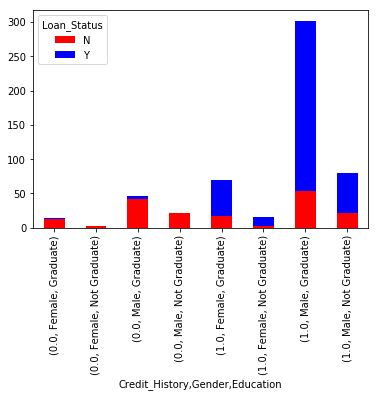

In [6]:
# pivoting and statistics
# Concept of pivoting
temp1 = train_data['Credit_History'].value_counts(ascending=True)
temp2 = train_data.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

print('Frequency Table for Credit History:' )
print(temp1)

print('\nProbility of getting loan for each Credit History class:' )
print(temp2)


temp4 = pd.crosstab([train_data['Credit_History'], train_data['Gender']], train_data['Loan_Status'])
temp4.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
temp5 = pd.crosstab([train_data['Credit_History'], train_data['Gender'],train_data['Education']], train_data['Loan_Status'])
temp5.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)


In [8]:
#Means to count missing value and dealing with them
train_data.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#Adding Mean as missing values
train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(), inplace=True)
train_data.apply(lambda x: sum(x.isnull()),axis=0)
train_data['Self_Employed'].value_counts(ascending=True)
#As no is most likely case fill empty with no
train_data['Self_Employed'].fillna('No',inplace=True)

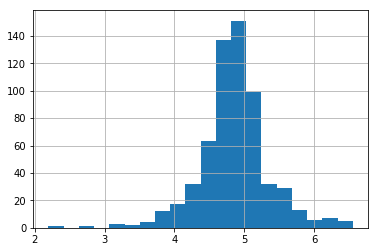

In [11]:
#Add new features or combine n_features
train_data['LoanAmount_log'] = np.log(train_data['LoanAmount'])
train_data['LoanAmount_log'].hist(bins=20)

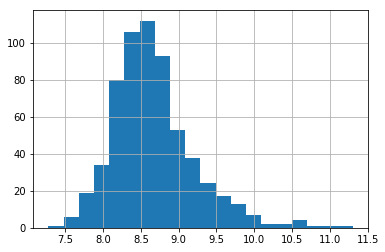

In [13]:
train_data['TotalIncome'] = train_data['ApplicantIncome'] + train_data['CoapplicantIncome']
train_data['TotalIncome_log'] = np.log(train_data['TotalIncome'])
train_data['TotalIncome_log'].hist(bins=20)